In [131]:
import numpy as np
from scipy.sparse import lil_matrix
from pprint import pprint
import mpmath as mp

In [129]:
def build_hamiltonian(L, xi):
    """
    Build the Hamiltonian matrix for a 1D chain with disorder.

    Parameters:
    L (int): Length of the chain.
    xi (float): potential gradient.

    Returns:
    scipy.sparse.lil_matrix: The Hamiltonian matrix in sparse format.
    """
    def idx(n):
        return n + L - 1
    
    H = lil_matrix((2*L, 2*L), dtype=np.float64)

    for n in range(0,2*L):
        # Hopping terms
        i = idx(n )
        j = idx(n )
        H[i, j] += -0.5
        
    # On-site disorder
    for n in range(0,2*L ):
        i = idx(n) 
        H[i, i] = np.float128((i - 0.5 - L) / xi)

    return H.tocsr()


In [125]:
# ensure Hamiltonian and eigen computations use double precision (float64)
Hamiltonian = build_hamiltonian(10, np.float128(5.0)).astype(np.float128)  # sparse CSR float64
H_dense = Hamiltonian.toarray().astype(np.float128)  # dense float64 for eigh

evals, evecs = np.linalg.eigh(H_dense)plt.figure(figsize=(10, 6))
plt.plot(np.arange(20), np.diag(Hamilton_build(10, 5.0)), marker='o', linestyle='-')
plt.xticks(ticks=np.arange(20), labels=np.arange(-10 + 1, 10 + 1))
plt.xlabel('Site index')
plt.ylabel('Diagonal element')
plt.title('Hamiltonian diagonal (L=10, xi=5.0)')
plt.grid(True)
plt.tight_layout()
plt.show()
# order eigenvectors by their corresponding eigenvalues (ascending)
idx = np.argsort(evals)
evals = evals[idx]
evecs = evecs[:, idx]
num_negative_eigvals = np.sum(evals < 0)
#print("Number of negative eigenvalues:", num_negative_eigvals)
correlation_mat = np.zeros((evecs.shape[1], evecs.shape[1]), dtype=np.float64)
for k in range(num_negative_eigvals):
    for j in range(evecs.shape[1]):
        for i in range(evecs.shape[1]):
            correlation_mat[i, j] += evecs[k, i] * evecs[k, j]

C = correlation_matfloat64
#print(evals)float64
#print(evecs)
P = evecs
#print(P[7])
print(C)
eigvals_C = np.linalg.eigvalsh(C)
B = (eigvals_C)
print (B)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(B, marker='o', linestyle='-', label='Eigenvalues B')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Plot of Eigenvalues B')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
eigenvalues_filtered = [val for val in B if val < 0 or val > 1]
print("Eigenvalues less than 0 and greater than 1:", eigenvalues_filtered)

SyntaxError: invalid syntax (1334446303.py, line 5)

In [162]:
def Hamilton_build(L,xi):
    n = 2 * L
    Res = mp.zeros(n, n)

    for i in range(1,n +1 ):
        for j in range(1,n + 1):

            if (i == 1 and j == L) or (i == L and j == 1):
                H[i -1,j -1] = mp.mpf("0.0")
                continue

            delta_ip1_j = 1 if (i + 1 == j) else 0
            delta_i_jp1 = 1 if (i == j + 1) else 0
            delta_ij    = 1 if (i == j) else 0

            Res[i-1,j-1] = -(mp.mpf("0.5")) * (delta_ip1_j + delta_i_jp1) \
                            + ((i - mp.mpf("0.5") - L)/xi) * delta_ij
    return Res

In [163]:
def Hamilton_buildtwo(L,xi):
    n = 2 * L
    Res = np.zeros((n, n))

    for i in range(1,n +1 ):
        for j in range(1,n + 1):

            if (i == 1 and j == L) or (i == L and j == 1):
                continue

            delta_ip1_j = 1 if (i + 1 == j) else 0
            delta_i_jp1 = 1 if (i == j + 1) else 0
            delta_ij    = 1 if (i == j) else 0

            Res[i-1,j-1] = -(0.5) * (delta_ip1_j + delta_i_jp1) \
                            + ((i - 0.5 - L)/xi) * delta_ij
    return Res

In [ ]:
def Eigensystem_precise(L, xi , Nprec = 200):
    mp.mp.dps = Nprec

    H = Hamilton_build(L,xi)

    evals, evecs = mp.eig(H)

    pairs = sorted(zip(evals, evecs), key=lambda pair: pair[0])

    evals_sorted = [pair[0] for pair in pairs]
    evecs_sorted = [pair[1] for pair in pairs]

    return evals_sorted, evecs_sorted

In [166]:
L = 10
xi = mp.mpf("5.0")
evals_precise, evecs_precise = Eigensystem_precise(L, xi , Nprec = 200)

print("Eigenvalues")
for v in evals_precise:
    print(v)    

Eigenvalues
-2.4786728774855074655360324772319153004490547627239705040390741111093216026763266603367154878806479219522108984524635818190843329617681765248694190324716093096637848147775692224957842989527843410126134
-2.0348226619063998456782923188803375973496131323872658118594202363304185563435844687815004156837014761276807330762859673667063911672502593636406221058784972021623504819431518492182474308726147298534096
-1.6872613525755537374813254951116863303814268841300654365888949719751128238428038505600239049214467207438189583605006736382160483672276025276975574519837175717554380914555702254322390522757665647273237
-1.394181621231875927302258825587438182069107606931206436948437947337406112347639624685158378257485785520877449705762138066942831212522110326411752732865712359508985423917084719417641517630483942777029
-1.139386125815058786810780202928403599622028343821695879739833074948784653887121231830023873260184515815078425208644268806244944867212244826291617915069430782292345846310933742

In [180]:
def Corr_mat(L, xi , Nprec = 200):
    mp.mp.dps = Nprec

    evals_precise, evecs_precise = Eigensystem_precise(L, xi , Nprec = 200)
    num_negative_eigvals = sum(1 for v in evals_precise if v < 0)
    C = [[mp.mpf('0') for _ in range(2*L)] for _ in range(2*L)]
    for i in range(L):
        for j in range(L):
            print(i,j)
            C[i][j] = 0.0
            for k in range(num_negative_eigvals):
                C[i][j] += evecs_precise[k][i] * evecs_precise[k][j]
    return C


In [182]:
def Corr_mat(L, xi, Nprec=200):
    mp.mp.dps = Nprec

    # Get precise eigenvalues and eigenvectors
    evals_precise, evecs_precise = Eigensystem_precise(L, xi, Nprec)

    # Find indices of negative eigenvalues
    neg_idx = [k for k, v in enumerate(evals_precise) if v < 0]

    # Initialize 2L × 2L correlation matrix
    C = [[mp.mpf('0') for _ in range(2*L)] for _ in range(2*L)]

    # Compute C_ij = sum_{k: eigval_k < 0} u_k[i] * u_k[j]
    for i in range(2*L):
        for j in range(2*L):
            s = mp.mpf('0')
            for k in neg_idx:
                s += evecs_precise[k][i] * evecs_precise[k][j]
            C[i][j] = s

    return C


In [184]:
def Corr_mat(L, xi, Nprec=200):
    mp.mp.dps = Nprec

    # Get eigenvalues and eigenvectors
    evals_precise, evecs_precise = Eigensystem_precise(L, xi, Nprec)

    # --- FIX HERE: convert eigenvectors to list-of-lists if needed ---
    if hasattr(evecs_precise, "__getitem__") and not isinstance(evecs_precise[0], list):
        # Assume eigenvectors are columns in a 2L x 2L matrix
        evecs_precise = [
            [evecs_precise[i, j] for i in range(2*L)]
            for j in range(2*L)
        ]
    # ----------------------------------------------------------------

    # Indices of negative eigenvalues
    neg_idx = [k for k, v in enumerate(evals_precise) if v < 0]

    # Initialize C
    C = [[mp.mpf('0') for _ in range(2*L)] for _ in range(2*L)]

    for i in range(2*L):
        for j in range(2*L):
            s = mp.mpf('0')
            for k in neg_idx:
                s += evecs_precise[k][i] * evecs_precise[k][j]
            C[i][j] = s

    return C


In [185]:
print(Corr_mat(10, mp.mpf("5.0")))

TypeError: list indices must be integers or slices, not tuple

In [164]:
pprint(Hamilton_buildtwo(10,5.0))
pprint(Hamilton_build(10,5.0))

array([[-1.9, -0.5, -0. , -0. , -0. , -0. , -0. , -0. , -0. ,  0. , -0. ,
        -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ],
       [-0.5, -1.7, -0.5, -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ,
        -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ],
       [-0. , -0.5, -1.5, -0.5, -0. , -0. , -0. , -0. , -0. , -0. , -0. ,
        -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ],
       [-0. , -0. , -0.5, -1.3, -0.5, -0. , -0. , -0. , -0. , -0. , -0. ,
        -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ],
       [-0. , -0. , -0. , -0.5, -1.1, -0.5, -0. , -0. , -0. , -0. , -0. ,
        -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ],
       [-0. , -0. , -0. , -0. , -0.5, -0.9, -0.5, -0. , -0. , -0. , -0. ,
        -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ],
       [-0. , -0. , -0. , -0. , -0. , -0.5, -0.7, -0.5, -0. , -0. , -0. ,
        -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ],
       [-0. , -0. , -0. , -0. , -0. , -0.

/home/ghosh_bishal/Documents/PhD Code/Gradient-potential/.venv/lib/python3.12/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(np.arange(20), np.diag(Hamilton_build(10, 5.0)), marker='o', linestyle='-')
plt.xticks(ticks=np.arange(20), labels=np.arange(-10 + 1, 10 + 1))
plt.xlabel('Site index')
plt.ylabel('Diagonal element')
plt.title('Hamiltonian diagonal (L=10, xi=5.0)')
plt.grid(True)
plt.tight_layout()
plt.show()
# Compare Hamilton_build for different xi values on the same plot
xi_values = [1, 2, 3]
plt.figure(figsize=(10, 6))

for xi_val in xi_values:
    diag = np.diag(Hamilton_build(10, xi_val))
    plt.plot(np.arange(20), diag, marker='o', linestyle='-', label=f'xi={xi_val}')

plt.xticks(ticks=np.arange(20), labels=np.arange(-10 + 1, 10 + 1))
plt.xlabel('Site index')
plt.ylabel('Diagonal element')
plt.title('Hamiltonian diagonal for different xi values (L=10)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

TypeError: 'tuple' object cannot be interpreted as an integer

In [140]:
# ensure Hamiltonian and eigen computations use double precision (float64)
Hamiltonian = build_hamiltonian(10, np.float128(5.0)).astype(np.float128)  # sparse CSR float64
H_dense = Hamiltonian.toarray().astype(np.float128)  # dense float64 for eigh
pprint(H_dense)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(20), np.diag(H_dense), marker='o', linestyle='-')
plt.xticks(ticks=np.arange(20), labels=np.arange(-10 + 1, 10 + 1))
plt.xlabel('Site index')
plt.ylabel('Diagonal element')
plt.title('Hamiltonian diagonal (L=10, xi=5.0)')
plt.grid(True)
plt.tight_layout()
plt.show()

IndexError: row index (20) out of bounds

In [135]:
# ensure Hamiltonian and eigen computations use double precision (float64)
Hamiltonian = build_hamiltonian(60, np.float64(40.0)).astype(np.float64)  # sparse CSR float64
H_dense = Hamiltonian.toarray().astype(np.float64)  # dense float64 for eigh

evals, evecs = np.linalg.eigh(H_dense)
# order eigenvectors by their corresponding eigenvalues (ascending)
idx = np.argsort(evals)
evals = evals[idx]
evecs = evecs[:, idx]
num_negative_eigvals = np.sum(evals < 0)
print("Number of negative eigenvalues:", num_negative_eigvals)
correlation_mat = np.zeros((evecs.shape[1], evecs.shape[1]), dtype=np.float64)

IndexError: row index (120) out of bounds

In [136]:
idx_sorted = np.argsort(evals)
P_30 = P[:, idx_sorted[:30]]

In [137]:
C = np.zeros((P_30.shape[1], P_30.shape[1]), dtype=np.float64)
for i in range(30):
    for j in range(30):
        C[i,j] = P[i].T@P[j]

print(C)

[[ 1.00000000e+00 -2.22044605e-16  1.38777878e-16 -4.44089210e-16
  -4.30211422e-16 -7.63278329e-17 -6.93889390e-17  2.22044605e-16
  -1.80411242e-16  7.63278329e-17 -1.38777878e-17  1.38777878e-17
  -1.11022302e-16  1.87350135e-16  1.94289029e-16 -1.38777878e-17
  -1.38777878e-17  1.38777878e-17 -1.38777878e-17 -1.11022302e-16
  -1.04083409e-16 -2.08166817e-17  6.93889390e-17  1.11022302e-16
   8.32667268e-17 -5.55111512e-17  2.77555756e-17 -5.55111512e-17
   1.45716772e-16 -2.68882139e-16]
 [-2.22044605e-16  1.00000000e+00 -4.85722573e-16 -3.46944695e-16
  -4.16333634e-16 -5.13478149e-16  6.93889390e-17 -1.38777878e-16
  -5.55111512e-17  6.93889390e-17  1.38777878e-17 -1.66533454e-16
  -6.93889390e-17  1.94289029e-16 -9.71445147e-17  1.38777878e-17
   9.71445147e-17 -3.46944695e-17 -2.77555756e-17 -2.08166817e-17
   9.02056208e-17  6.93889390e-18 -2.77555756e-17 -6.24500451e-17
  -5.20417043e-17  6.24500451e-17  9.54097912e-17  6.93889390e-18
  -1.18828558e-16  1.71737624e-16]
 [ 1.3

In [54]:
#print (build_hamiltonian(60, 40.0))
eigvals_C = np.linalg.eigvalsh(C)
B = (eigvals_C)
print (B)
A = (np.log((1 - B)/B))

[-5.52875547e-16 -5.22973462e-16 -4.54002497e-16 -3.73130319e-16
 -3.60240099e-16 -3.22499376e-16 -2.71247618e-16 -2.63469661e-16
 -1.92262424e-16 -1.88007915e-16 -1.50580086e-16 -1.21036692e-16
 -1.06705317e-16 -1.04753473e-16 -9.05978466e-17 -5.81332422e-17
 -5.35256833e-17 -4.97055383e-17 -1.09601305e-17 -6.53127863e-18
 -1.70580961e-18 -1.53276765e-19 -5.48729559e-20 -3.68061008e-21
 -1.60168146e-21 -1.23777414e-23 -4.08037793e-24 -6.26627850e-27
 -2.85021152e-27 -2.73774442e-28 -5.76694187e-30 -2.34333306e-32
 -7.44792850e-33 -1.54254043e-34 -1.32420555e-35 -3.99926798e-39
 -5.52948699e-41 -1.50729814e-43 -3.79722799e-46 -7.28820831e-48
 -7.93388010e-49 -4.12408424e-49 -3.75417756e-49 -2.11018835e-49
 -8.93252395e-50 -5.84356825e-50 -6.29321519e-51  6.60524891e-51
  3.88365141e-50  1.29718228e-49  2.37544313e-49  4.76065025e-49
  6.80028880e-49  1.16653050e-47  1.01420307e-45  1.83717433e-43
  1.28118036e-41  9.52619126e-39  6.47338130e-37  1.42418037e-35
  4.07179867e-34  2.25818

/tmp/ipykernel_82323/1870086516.py:5: RuntimeWarning: divide by zero encountered in log
  A = (np.log((1 - B)/B))
/tmp/ipykernel_82323/1870086516.py:5: RuntimeWarning: invalid value encountered in log
  A = (np.log((1 - B)/B))


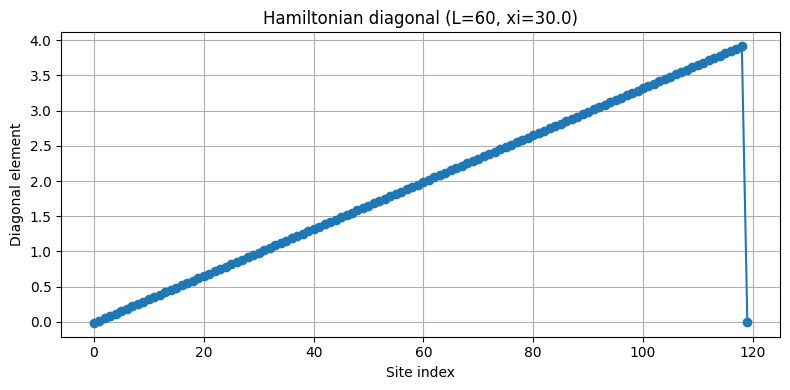

In [32]:
import matplotlib.pyplot as plt

L = 60
xi = 30.0
H = build_hamiltonian(L, xi)
diag = H.diagonal()

plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(diag)), diag, marker='o', linestyle='-')
plt.xlabel('Site index')
plt.ylabel('Diagonal element')
plt.title(f'Hamiltonian diagonal (L={L}, xi={xi})')
plt.grid(True)
plt.tight_layout()
plt.show()

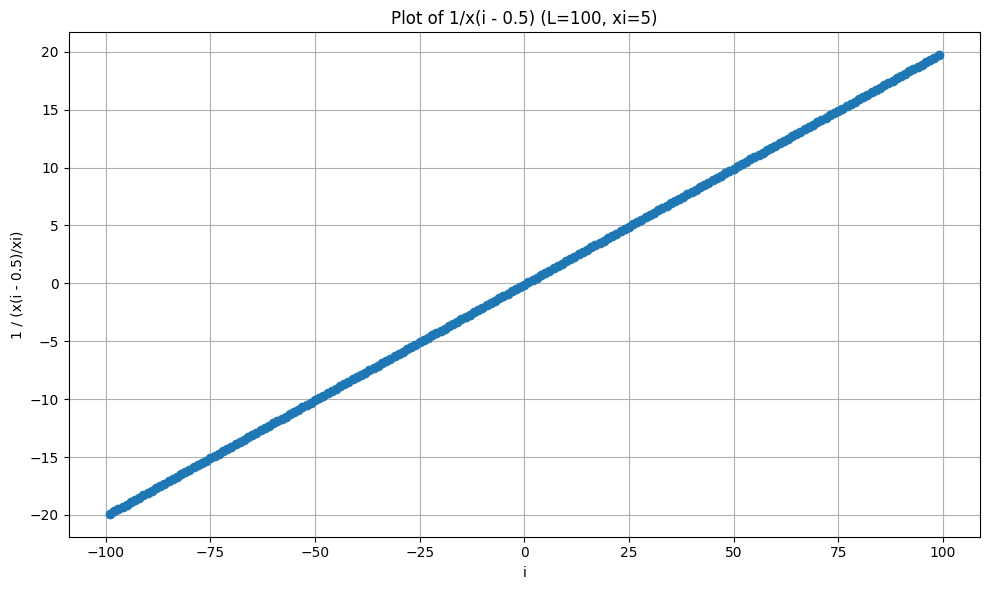

In [35]:
L = 100
xi = 5
x = np.arange(-L + 1, L)
y = 1 / xi * (x - 0.5)

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('i')
plt.ylabel('1 / (x(i - 0.5)/xi)')
plt.title(f'Plot of 1/x(i - 0.5) (L={L}, xi={xi})')
plt.grid(True)
plt.tight_layout()
plt.show()